<a href="https://colab.research.google.com/github/s-manterola/Earthquake/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
from numpy import datetime64
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Earthquake/Base de datos/database.csv'

df = pd.read_csv(filename)

In [ ]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Depth      23412 non-null  float64
 5   Magnitude  23412 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [ ]:
while(True):
  try:
    pd.to_datetime(df['Date'], format='%m/%d/%Y')
  except ValueError as err:
    err = str(err)
    er = err[err.index("'")+1:err.index("'",err.index("'")+1)]

    corD = er[er.index('-')+1: er.index('-')+3] + "/" + er[er.index('-')+4: er.index('-')+6] + "/" + er[0:er.index('-')]
    corT = er[er.index('T')+1: er.index('Z')-4]

    df['Date'].replace(er, corD, inplace = True)
    df['Time'].replace(er, corT, inplace = True)
  else:
    break

df['DateTime'] = pd.to_datetime(df['Date'] + ','+ df['Time'],format='%m/%d/%Y,%H:%M:%S')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23412 non-null  object        
 1   Time       23412 non-null  object        
 2   Latitude   23412 non-null  float64       
 3   Longitude  23412 non-null  float64       
 4   Depth      23412 non-null  float64       
 5   Magnitude  23412 non-null  float64       
 6   DateTime   23412 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.3+ MB


In [ ]:
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,DateTime
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,1965-01-09 13:32:50


In [ ]:
#Parametros a definir:
# Tiempo: tiempo desde el sismo en que se buscaran mas sismos (en segundos)
# Distancia: Distancia desde el sismo en que se buscaran mas sismos (en kilometros)

# Por ahora se definiran Tiempo: 864000s (10 dias), Distancia: 250km

Tiempo = 864000
Distancia = 250

In [ ]:
df['Replicas'] = 0

In [ ]:
R = 6371 #Radio de la tierra en km

for i in range(df.shape[0]):
  for j in range(i+1,df.shape[0]):
    if(i==j):
      continue
    d = math.acos(math.sin(math.radians(df.iloc[i,2]))*math.sin(math.radians(df.iloc[j,2]))+
                  math.cos(math.radians(df.iloc[i,2]))*math.cos(math.radians(df.iloc[j,2]))*
                  math.cos(math.radians(df.iloc[i,3]-df.iloc[j,3])))*R

    dt = (df.iloc[j,6]-df.iloc[i,6]).total_seconds()
    #print(dt)
    if (dt > Tiempo):
      break
    elif (d <= Distancia):
      df.iloc[i,7] = 1
      break
  #print(f"Progreso: {i*10000/(df.shape[0]*100.0)}%")

In [ ]:
df.describe()

,Latitude,Longitude,Depth,Magnitude,Replicas
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531,0.274774
std,30.113183,125.511959,122.651898,0.423066,0.446410
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000
25%,-18.653000,-76.349750,14.522500,5.600000,0.000000
50%,-3.568500,103.982000,33.000000,5.700000,0.000000
75%,26.190750,145.026250,54.000000,6.000000,1.000000
max,86.005000,179.998000,700.000000,9.100000,1.000000


In [ ]:
print(f"Porcentaje de Sismos con Replicas con magnitud sobre 5.5: {100*df[df['Replicas'] !=0]['Date'].count()/df.shape[0]}%")

Porcentaje de Sismos con Replicas con magnitud sobre 5.5: 27.477362036562447%


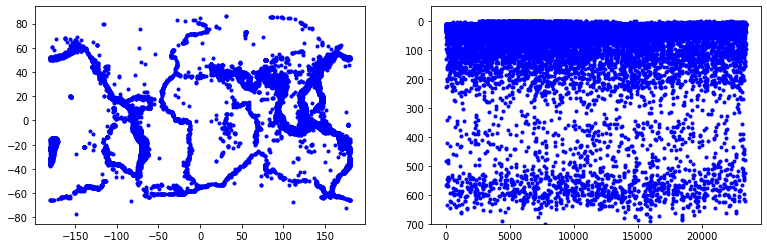

In [ ]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(df['Longitude'], df['Latitude'], "b.")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(df['Depth'], "b.")

ax2.set_ylim(max(df['Depth']), min(df['Depth']-50))

plt.show()

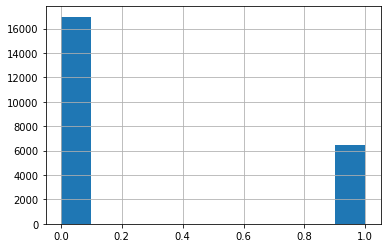

In [ ]:
df['Replicas'].hist();

In [ ]:
from sklearn.cluster import KMeans

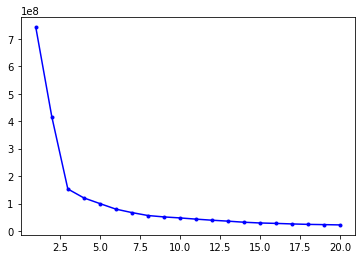

In [ ]:
score = []

X = df.drop(['Date', 'Time', 'DateTime'], axis = 1)
k_clusters = range(1,21)
for k in k_clusters:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  score.append(-kmeans.score(X))

plt.plot(k_clusters, score, 'b.-');

In [ ]:
y_pre = kmeans.predict(X)

In [ ]:
X.head()

,Latitude,Longitude,Depth,Magnitude,Replicas
0,19.246,145.616,131.6,6.0,0
1,1.863,127.352,80.0,5.8,0
2,-20.579,-173.972,20.0,6.2,0
3,-59.076,-23.557,15.0,5.8,0
4,11.938,126.427,15.0,5.8,0


In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pre = kmeans.predict(X)


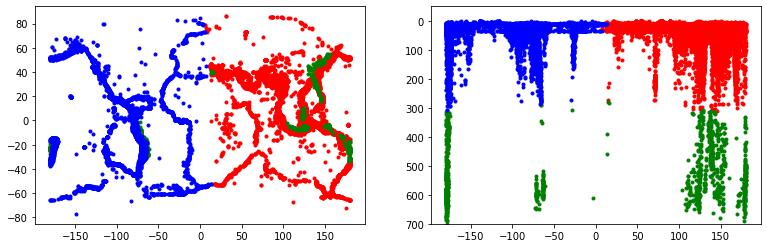

In [ ]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y_pre==0]['Longitude'], X[y_pre==0]['Latitude'], 'r.')
ax1.plot(X[y_pre==1]['Longitude'], X[y_pre==1]['Latitude'], 'g.')
ax1.plot(X[y_pre==2]['Longitude'], X[y_pre==2]['Latitude'], 'b.')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pre==0]['Longitude'], X[y_pre==0]['Depth'], 'r.')
ax2.plot(X[y_pre==1]['Longitude'], X[y_pre==1]['Depth'], 'g.')
ax2.plot(X[y_pre==2]['Longitude'], X[y_pre==2]['Depth'], 'b.')

ax2.set_ylim(max(df['Depth']), min(df['Depth']-50))

plt.show()

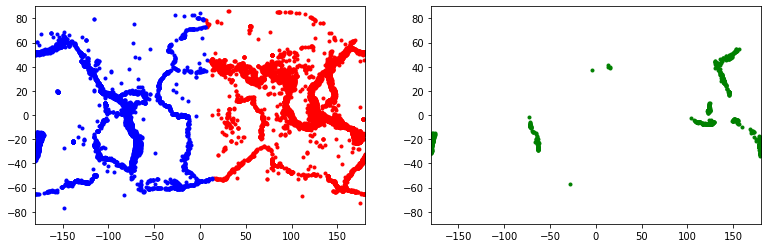

In [ ]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y_pre==0]['Longitude'], X[y_pre==0]['Latitude'], 'r.')
ax1.plot(X[y_pre==2]['Longitude'], X[y_pre==2]['Latitude'], 'b.')

ax1.set_xlim(-180,180)
ax1.set_ylim(-90,90)

ax2 = fig.add_subplot(1,2,2)

ax2.plot(X[y_pre==1]['Longitude'], X[y_pre==1]['Latitude'], 'g.')
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
plt.show()

In [ ]:
X_sup = X.drop(X[y_pre == 1].index, axis = 0)
X_deep = X[y_pre == 1]
X_sup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22091 entries, 0 to 23411
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   22091 non-null  float64
 1   Longitude  22091 non-null  float64
 2   Depth      22091 non-null  float64
 3   Magnitude  22091 non-null  float64
 4   Replicas   22091 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.0 MB


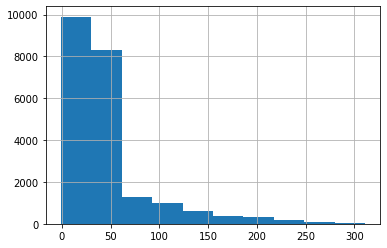

In [ ]:

X_sup['Depth'].hist()


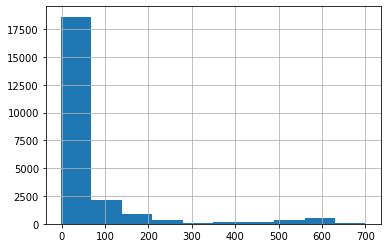

In [ ]:
X['Depth'].hist()

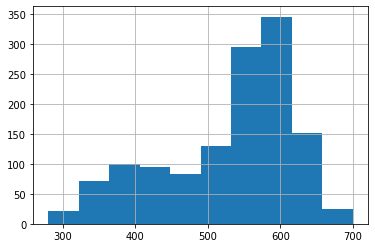

In [ ]:
X_deep['Depth'].hist()

In [ ]:
print(f"Porcentaje de Sismos superficiales con Replicas con magnitud sobre 5.5: {100*X_sup[X_sup['Replicas'] !=0]['Longitude'].count()/X_sup.shape[0]}%")
print(f"Porcentaje de Sismos profundoscon Replicas con magnitud sobre 5.5: {100*X_deep[X_deep['Replicas'] !=0]['Longitude'].count()/X_deep.shape[0]}%")

Porcentaje de Sismos superficiales con Replicas con magnitud sobre 5.5: 29.623109024517476%
Porcentaje de Sismos profundoscon Replicas con magnitud sobre 5.5: 23.40267459138187%


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 25, min_samples = 15)
y_dbscan = dbscan.fit_predict(X)

print(f"min: {min(y_dbscan)} max: {max(y_dbscan)}")

min: -1 max: 6


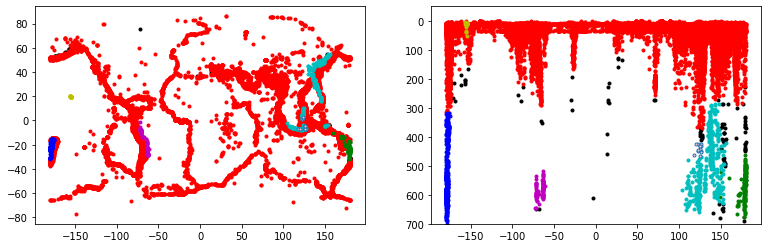

In [ ]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y_dbscan==-1]['Longitude'], X[y_dbscan==-1]['Latitude'], 'k.')
ax1.plot(X[y_dbscan==0]['Longitude'], X[y_dbscan==0]['Latitude'], 'r.')
ax1.plot(X[y_dbscan==1]['Longitude'], X[y_dbscan==1]['Latitude'], 'g.')
ax1.plot(X[y_dbscan==2]['Longitude'], X[y_dbscan==2]['Latitude'], 'b.')
ax1.plot(X[y_dbscan==3]['Longitude'], X[y_dbscan==3]['Latitude'], 'c.')
ax1.plot(X[y_dbscan==4]['Longitude'], X[y_dbscan==4]['Latitude'], 'm.')
ax1.plot(X[y_dbscan==5]['Longitude'], X[y_dbscan==5]['Latitude'], 'y.')
ax1.plot(X[y_dbscan==6]['Longitude'], X[y_dbscan==6]['Latitude'], '.', markerfacecolor = 'pink')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_dbscan==-1]['Longitude'], X[y_dbscan==-1]['Depth'], 'k.')
ax2.plot(X[y_dbscan==0]['Longitude'], X[y_dbscan==0]['Depth'], 'r.')
ax2.plot(X[y_dbscan==1]['Longitude'], X[y_dbscan==1]['Depth'], 'g.')
ax2.plot(X[y_dbscan==2]['Longitude'], X[y_dbscan==2]['Depth'], 'b.')
ax2.plot(X[y_dbscan==3]['Longitude'], X[y_dbscan==3]['Depth'], 'c.')
ax2.plot(X[y_dbscan==4]['Longitude'], X[y_dbscan==4]['Depth'], 'm.')
ax2.plot(X[y_dbscan==5]['Longitude'], X[y_dbscan==5]['Depth'], 'y.')
ax2.plot(X[y_dbscan==6]['Longitude'], X[y_dbscan==6]['Depth'], '.', markerfacecolor = 'pink')

ax2.set_ylim(max(df['Depth']), min(df['Depth']-50))

plt.show()